In [1]:
import numpy as np 
import seaborn as sns

In [3]:
iris_df = sns.load_dataset('iris') 

In [4]:
iris_df.head() 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## T-test and P-value 

In [5]:
sepal_width = iris_df['sepal_width']
sepal_width_arr = np.array(sepal_width) 

In [7]:
len(sepal_width_arr)

150

In [8]:
sepal_mean = np.mean(sepal_width_arr) 
print(sepal_mean) 

3.0573333333333337


In [9]:
sample_size = 50 
sepal_width_sample = np.random.choice(sepal_width_arr, sample_size) 

In [10]:
sepal_width_sample

array([3.5, 2.7, 3.4, 2.9, 3. , 3. , 3. , 3. , 3. , 3.3, 2.9, 3. , 2.7,
       2.7, 3.1, 2.8, 2.8, 3.8, 2.4, 3.7, 2.9, 3. , 3. , 2.9, 3. , 3. ,
       3. , 3.2, 3.6, 3.2, 4.1, 3. , 2.8, 3.2, 2.5, 2.8, 3.1, 3.2, 3.8,
       3.5, 2.7, 2.9, 3.8, 3. , 2.6, 3.2, 4.1, 2.9, 2.8, 3.3])

In [11]:
from scipy.stats import ttest_1samp 

In [12]:
ttest, p_value = ttest_1samp(sepal_width_sample, 3)
# the 3 denotes the expected value in null hypothesis, remember, in the null hypothesis, we made the 
# assumption that the sample mean and the population mean are the same 

In [83]:
print(p_value) 


0.08237089459105305


In [15]:
# the threshold for p-value is considered to be 0.05, which means if the p_value we had is 
# less than 0.05, we are rejecting the hypothesis, in other words there is a difference
# and if the p_value is greater than 0.05, we will accept the null hypothesis

In [16]:
# in this case, we will accept the null hypothesis, let's find out the mean value of the sample to for ourselves 

In [17]:
np.mean(sepal_width_sample)

3.096000000000001

In [18]:
#indeed , there's not much difference between the sample mean and the population mean 

# Central Limit Theorem 

In [20]:
import matplotlib.pyplot as plt 

In [24]:
def sample_mean_cal(population, sample_size, n_samples): 
    sample_means = [] 
    for i in range(n_samples): 
        sample = np.random.choice(population_arr, size=sample_size, replace=True) 
        sample_mean = np.mean(sample) 
        sample_means.append(sample_mean) 
    return sample_means 

D:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


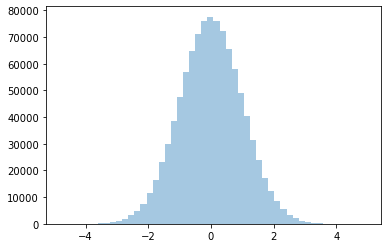

In [41]:
x = np.random.normal(size=1_000_000)
_ = sns.distplot(x, kde=False)
plt.show()

D:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


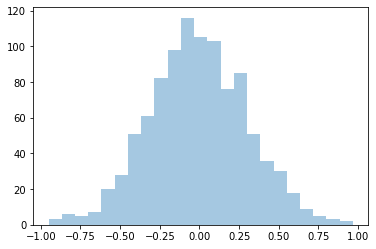

In [85]:
_ = sns.distplot(sample_mean_cal(x, 10, 1000), kde=False)
plt.show()

In [45]:
# the more samples we take, the more likely the sample means will be normally distributed 

# Covariance and Correlation 

In [104]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [74]:
iris_df['sepal_length'].corr(iris_df['petal_length'])

0.8717537758865831

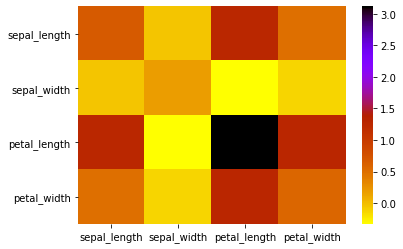

In [61]:
_ = sns.heatmap(iris_df.cov(), cmap='gnuplot_r')
plt.show() 

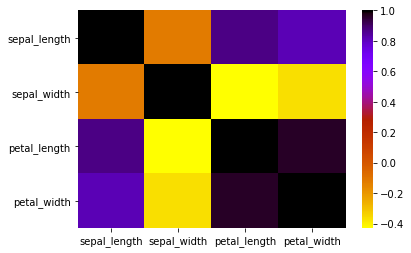

In [60]:
_ = sns.heatmap(iris_df.corr(), cmap='gnuplot_r')
plt.show() 

# Measures of Dispersion

In [75]:
# describe() method gives us some major statistics amongst them is the std. 
iris_df.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
# we can also compute the range, let's take the petal_length and calculate it's range
# the range is the difference between the lowest value and highest value 
Range = np.max(np.array(iris_df['sepal_length'])) - np.min(np.array(iris_df['sepal_length']))

In [79]:
Range

3.6000000000000005

In [80]:
# variance can also be computed using .var() from numpy 
# let's calculate the variance of the sepal length
np.var(np.array(iris_df['sepal_length']))

0.6811222222222223

In [86]:
# add percentiles 

# Cumulative distribution function 

In [102]:
def cdf(df): 
    x = np.sort(df) 
    y = np.arange(len(df)) / float(len(df)) 
    plt.plot(x,y,marker='o', linestyle='none') 
    plt.xlabel("sepal width")
    plt.ylabel("Probabilities")
    plt.title("Cumulative Distributive Function")
    
    plt.show() 

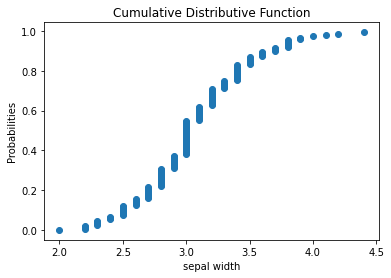

In [103]:
cdf(iris_df['sepal_width'])